<a href="https://colab.research.google.com/github/SIDDXSingh/AutoEncoders/blob/main/Vanilla_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt  # for plotting images
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import time
import os
import torchvision
from torchvision import transforms

In [ ]:
torch.cuda.device(0)
torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

transform=transforms.Compose([transforms.ToTensor()])

from torchvision.datasets import MNIST

train_data = MNIST(root = './', train=True, download=True, transform=transform)
val_data = MNIST(root = './', train=False, download=True, transform=transform)

--2021-07-30 19:15:52--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-07-30 19:15:53--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [            <=>     ]  33.20M  11.4MB/s    in 2.9s    

2021-07-30 19:15:56 (11.4 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_data, batch_size=60, shuffle=False)

In [ ]:
dataiter=iter(test_loader)
images,labels=dataiter.next()

In [ ]:
print(images[0])

In [ ]:
class AE(nn.Module):
  def __init__(self):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(1,8,3,stride=1),
            nn.ReLU(),
            nn.Conv2d(8,16,5,stride=1),
            nn.ReLU(),
            nn.Conv2d(16,32,5,stride=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )  # The encoder network
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(32,16,3, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16,8,5, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(8,1,8, stride=1),
            nn.Sigmoid(),
        )  # The decoder network

  def forward(self, features):
      x = self.encoder(features.float())
      return self.decoder(x)


  def encode(self,inp):
    return self.encoder(inp)

  def decode(self, latent):
    return self.decode(latent)


  

In [ ]:
model=AE()

In [ ]:
criterion = nn.functional.binary_cross_entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
step_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2, gamma= 0.1)
model=model.to(device)

In [ ]:
def train(model,trainloader):
  loss_list=[]
  for epoch in range (0,10):
    running_loss=0
    for i,data in enumerate (trainloader):
      X,Y=data
      X=X.to(device)
      Y=Y.to(device)
      optimizer.zero_grad()
      output=model.forward(X)
      output=output.to(device)
      loss=criterion(output,X)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

      if i== 1:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %f' %
            (epoch + 1, 10, running_loss /128))
        loss_list.append(running_loss/128)
        running_loss = 0.0
  return loss_list

In [ ]:
loss_list=train(model,trainloader=train_loader)

[1,    10] loss: 0.011459
[2,    10] loss: 0.001523
[3,    10] loss: 0.001312
[4,    10] loss: 0.001232
[5,    10] loss: 0.001190
[6,    10] loss: 0.001179
[7,    10] loss: 0.001175
[8,    10] loss: 0.001159
[9,    10] loss: 0.001156
[10,    10] loss: 0.001125


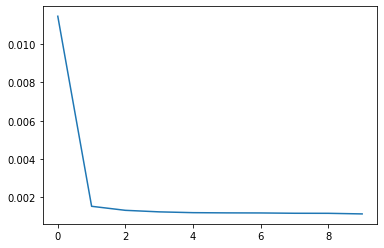

In [ ]:
plt.plot(loss_list)

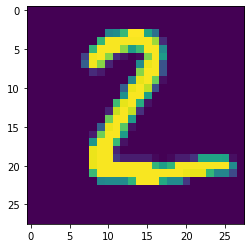

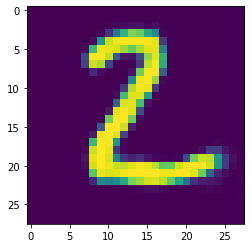

In [ ]:
with torch.no_grad():
  x=model.forward(images.to(device))
  x=x.cpu()
  plt.imshow(images[1].permute(1,2,0).squeeze())
  plt.show()
  plt.imshow(x[1].permute(1,2,0).squeeze())
  plt.show()




In [ ]:
test_img=0
output=0
with torch.no_grad():
  test_loss=0.0
  for i,data in enumerate (test_loader):
      X,Y=data
      X=X.to(device)
      test_img=X
      Y=Y.to(device)
      output=model.forward(X)
      output=output.to(device)
      loss=criterion(output,X)
      test_loss += loss.item()
  print(test_loss/60)

0.19939643448839586


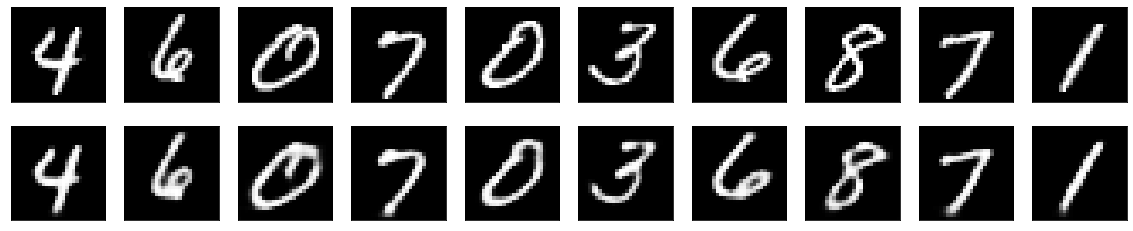

In [ ]:
with torch.no_grad():
        number = 10
        plt.figure(figsize=(20, 4))
    
        for index in range(number):
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(test_img[index].cpu().numpy().reshape(28, 28))
         
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)  
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(output[index].cpu().numpy().reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()